In [1]:
#importing the required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import log
data=pd.read_csv('konsumption.csv',parse_dates=['data'],index_col='data')

In [2]:
#Converting the datatype of the index column to the datetime
data.index=pd.to_datetime(data.index)

In [3]:
data.tail()

,consumption
data,
2017-09-01,256440
2017-12-01,259463
2018-03-01,262391
2018-06-01,265006
2018-09-01,267084


In [4]:

import datetime
from pandas.tseries.offsets import DateOffset

dates=[datetime.datetime(1959,1,1)+DateOffset(months=x) for x in range(0,236)]

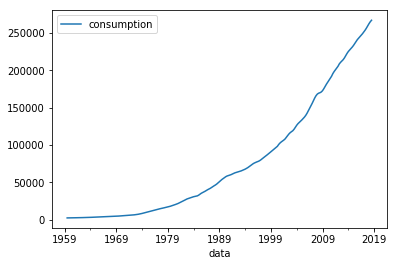

In [5]:
data.plot()

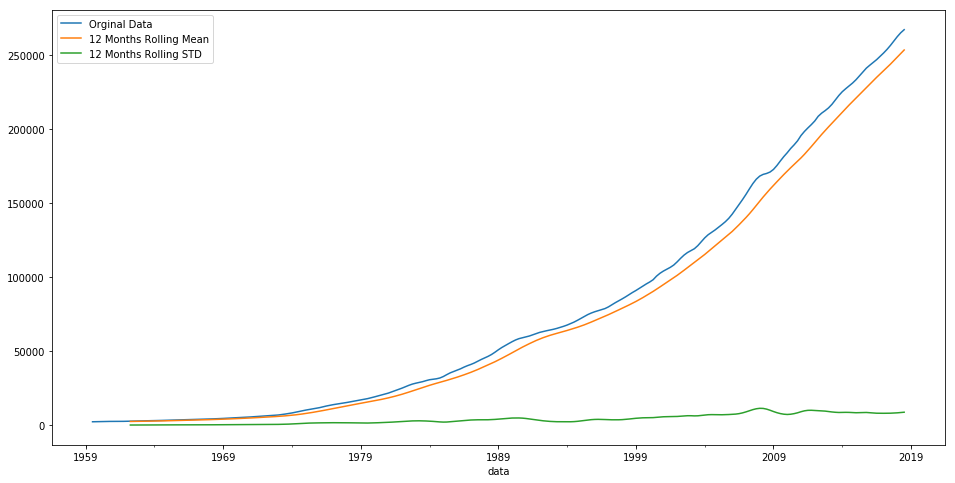

In [6]:
#Plotting the dataset along with 12 months Rolling Mean and STD
data['consumption'].plot(figsize=(16,8),label='Orginal Data')
data['consumption'].rolling(12).mean().plot(label='12 Months Rolling Mean')
data['consumption'].rolling(12).std().plot(label='12 Months Rolling STD')
plt.legend()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
seasonal=seasonal_decompose(data['consumption'])


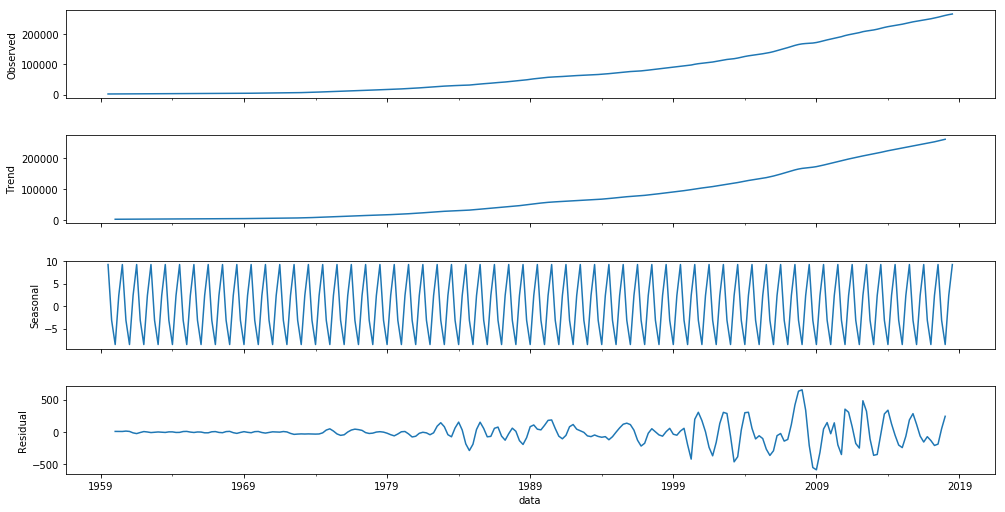

In [9]:
seasonal_plot=seasonal.plot()
seasonal_plot.set_size_inches(16,8)

In [10]:
#For Checking if our dataset is stationary or  not
from statsmodels.tsa.stattools import adfuller

In [11]:
#The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
def adfuller_test(data):
    
    result=adfuller(data)
    
    print('Augemented Dicky Fuller Test Statistics')
    label=['ADF Test Statistics','P-Value','Number Of Lags','Number Of Observation Used']
    
    for label,value in zip(label,result):
        print(label+' : '+str(value))
    
    if result[1]<=0.05:
        print('Strong Evidence Against The Null Hypothesis')
        print('Reject The Null Hypothesis')
        print('Data Has No Unit Roots And Is Stationary')
        
    else:
        print('Weak Evidence Against The Null Hypothesis')
        print('Cannot Reject The Null Hypothesis')
        print('Data Has Unit Roots And Is Not Stationary')

In [12]:
#Appyling ADF Test on our datset
adfuller_test(data['consumption'])

Augemented Dicky Fuller Test Statistics
ADF Test Statistics : 1.0633611287210059
P-Value : 0.9948914689259672
Number Of Lags : 11
Number Of Observation Used : 225
Weak Evidence Against The Null Hypothesis
Cannot Reject The Null Hypothesis
Data Has Unit Roots And Is Not Stationary


In [13]:

#using the shift function to make the data stationary
data['First Difference']=data['consumption']-data['consumption'].shift(1)


In [14]:
#Droping the null value i.e the first value after applying the shift function on our dataset will become null.
#Again Appyling the ADF Test on our dataset after applying the Shift Function
adfuller_test(data['First Difference'].dropna())

Augemented Dicky Fuller Test Statistics
ADF Test Statistics : -0.7892813775512086
P-Value : 0.822250323639798
Number Of Lags : 10
Number Of Observation Used : 225
Weak Evidence Against The Null Hypothesis
Cannot Reject The Null Hypothesis
Data Has Unit Roots And Is Not Stationary


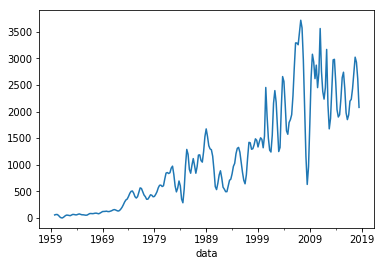

In [15]:
#Cheking Our New Dataset i.e Stationary Dataset as requrired by our model
data['First Difference'].plot()

In [16]:

#Importing The Auto Correleation Plot
#Our Main Priority here is deciding whether we will use the AR or MA component of the ARIMA model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

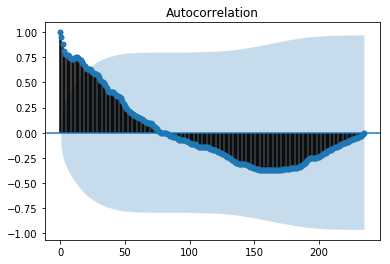

In [17]:
#Auto Correlation Plot
acf=plot_acf(data['First Difference'].dropna())

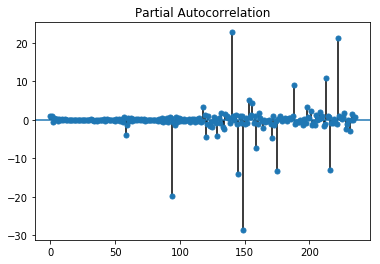

In [18]:
#Partial Auto Correlation Plot
pacf=plot_pacf(data['First Difference'].dropna())

In [19]:
#Importing the libraries to be used for ARIMA Model
import statsmodels.api as sm

In [20]:
model=sm.tsa.statespace.SARIMAX(data['consumption'],order=(0,1,0),seasonal_order=(1,1,1,12))


c:\users\merri\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


In [21]:

#Fitting Our Model
result=model.fit()

In [22]:
#Checking the Summary of the result calculated by our ARIMA Model
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        consumption   No. Observations:                  237
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -1728.797
Date:                            Thu, 24 Jan 2019   AIC                           3463.594
Time:                                    22:06:05   BIC                           3473.829
Sample:                                09-01-1959   HQIC                          3467.726
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1993      0.210     -0.951      0.342      -0.610       0.212
ma.S.L12      -0.1265      0.210   

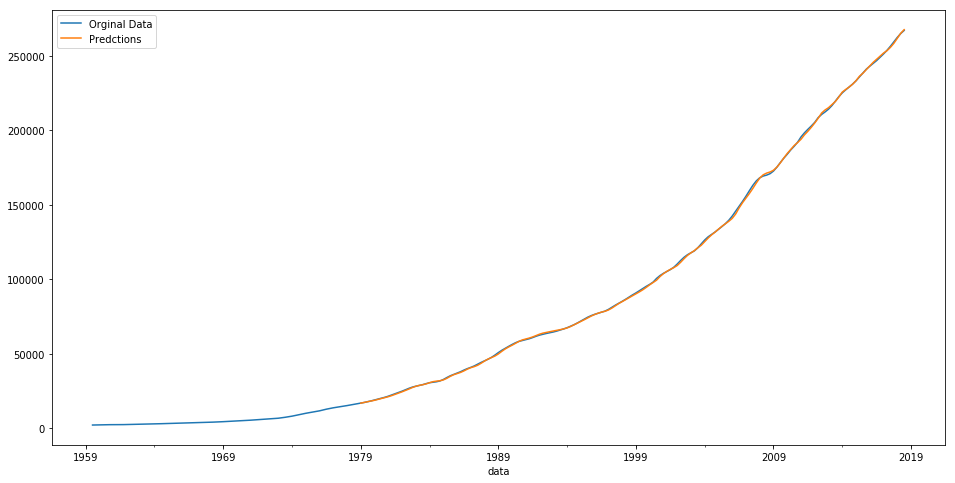

In [25]:
#Making The Past Prediction and Comapring it with the Original Data to check the accuracy of our model
data['consumption'].plot(figsize=(16,8),label='Orginal Data')
data['Future Predictions']=result.predict(start=78,end=308)
data['Future Predictions'].plot(label='Predctions')
plt.legend()